# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

#import API key
from api_keys import weather_api_key

#import citipy to determine city based on latitude and longitude
from citipy import citipy

#import geopy to find country based on latitude and longitude
from geopy.geocoders import Nominatim

#output to File (CSV)
output_data_file = "output_data/cities.csv"

#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#list for holding lat/lng and cities
lat_lngs = []
cities = []

#create a set of random lat and lng combinations, zip into one list variable
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if the city is not already in our cities list, add it
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:

url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=' + weather_api_key + '&q=' 

cityData = []
cityDataStats = []
set_count = 1 #group
record = 1 #record within group

print(f'Beginning Data Retrieval')
print(f'----------------------------')

for i, city in enumerate(cities):
    if(i % 50 == 0 and i >= 50):
        set_count += 1 #make new group
        record = 0 #reset records in the group 
        
#output record and group being processed
    print(f'processing record {record} of set {set_count} | {city}')       
     
    record += 1
    
    cityurl = url + city
    try:
        cityWeather = requests.get(cityurl).json()
        lat = cityWeather['coord']['lat']
        lon = cityWeather['coord']['lon']
        maxTemp = cityWeather['main']['temp_max']
        humidity = cityWeather['main']['humidity']
        cloudiness = cityWeather['clouds']['all']
        windSpeed = cityWeather['wind']['speed']
        date = cityWeather['dt']
        geolocator = Nominatim(user_agent="python_api_project")
        location = geolocator.reverse(str(lat)+","+str(lon))
        address = location.raw['address']
        country_code = address.get('country_code').upper()
        
        cityData.append({'City':city, 'Lat':lat, 'Lng':lon, 'Max Temp': maxTemp, 
                         'Humidity':humidity, 'Cloudiness':cloudiness, 'Wind Speed':windSpeed,
                        'Date':date})
        cityDataStats.append({'Lat':lat, 'Lng':lon, 'Max Temp': maxTemp, 
                         'Humidity':humidity, 'Cloudiness':cloudiness, 'Wind Speed':windSpeed,
                        'Date':date})
        #cityDataDisplay_pd
        
        

    except:
        print(f'{city} not found. Skipping...')

    if (i == 19):
        break

Beginning Data Retrieval
----------------------------
processing record 1 of set 1 | rikitea
processing record 2 of set 1 | illoqqortoormiut
illoqqortoormiut not found. Skipping...
processing record 3 of set 1 | ilulissat
processing record 4 of set 1 | hermanus
processing record 5 of set 1 | punta arenas
processing record 6 of set 1 | albany
processing record 7 of set 1 | souillac
processing record 8 of set 1 | broome
processing record 9 of set 1 | torbay
processing record 10 of set 1 | cidreira
processing record 11 of set 1 | thompson
processing record 12 of set 1 | floresta
processing record 13 of set 1 | bandarbeyla
processing record 14 of set 1 | kapaa
processing record 15 of set 1 | tasiilaq
processing record 16 of set 1 | puerto ayora
processing record 17 of set 1 | barentsburg
barentsburg not found. Skipping...
processing record 18 of set 1 | vaitupu
vaitupu not found. Skipping...
processing record 19 of set 1 | nikolskoye
processing record 20 of set 1 | atuona


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cityData_pd = pd.DataFrame(cityData)
cityData_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,rikitea,-23.1203,-134.9692,79.12,70,96,19.22,1619197819
1,ilulissat,69.2167,-51.1000,41.00,48,20,16.11,1619197680
2,hermanus,-34.4187,19.2345,57.99,82,76,2.51,1619197821
3,punta arenas,-53.1500,-70.9167,48.20,93,75,4.61,1619197554
4,albany,42.6001,-73.9662,55.99,25,17,5.01,1619197740


In [5]:
cityDataStats_pd = pd.DataFrame(cityDataStats)
cityDataStats_pd.describe(datetime_is_numeric=True)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,1.700000e+01
mean,13.755159,-53.772818,61.965882,63.117647,52.117647,11.670000,1.619198e+09
std,39.566039,64.122939,20.632197,19.025911,30.825887,6.523442,2.151671e+02
min,-53.150000,-159.319000,21.200000,25.000000,1.000000,2.510000,1.619197e+09
25%,-20.516700,-90.351800,48.200000,49.000000,25.000000,5.500000,1.619197e+09
50%,9.494200,-52.731400,57.990000,69.000000,40.000000,11.270000,1.619198e+09
75%,47.666600,-37.636800,79.120000,78.000000,76.000000,16.110000,1.619198e+09
max,69.216700,57.516700,94.890000,93.000000,96.000000,21.850000,1.619198e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [49]:
#get loc on cities that have humidity <= 100% and create clean DataFrame
#note: this was much cleaner than identifying rows by index and dropping to get a clean DataFrame
#note: the max humidity may be below 100, but this is a good exercise regardless

cityDataClean_pd = pd.DataFrame()
cityDataClean_pd = cityData_pd.loc[cityData_pd['Humidity'] <= 100]

cityDataClean_pd.head(10)
        

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,rikitea,-23.1203,-134.9692,79.12,70,96,19.22,1619197819
1,ilulissat,69.2167,-51.1000,41.00,48,20,16.11,1619197680
2,hermanus,-34.4187,19.2345,57.99,82,76,2.51,1619197821
3,punta arenas,-53.1500,-70.9167,48.20,93,75,4.61,1619197554
4,albany,42.6001,-73.9662,55.99,25,17,5.01,1619197740
5,souillac,-20.5167,57.5167,78.80,78,40,12.66,1619197266
6,broome,42.2506,-75.8330,53.01,37,1,19.57,1619197723
7,torbay,47.6666,-52.7314,48.20,61,75,21.85,1619197528
8,cidreira,-30.1811,-50.2056,72.70,69,83,16.02,1619197661
9,thompson,55.7435,-97.8558,21.20,49,20,6.91,1619197422


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

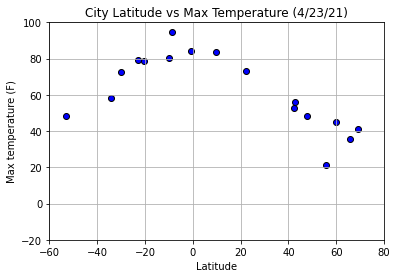

In [59]:
plt.grid()
plt.ylim(-20, 100)
plt.xlim(-60, 80)
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title('City Latitude vs Max Temperature (4/23/21)') 
plt.scatter(cityDataClean_pd['Lat'], cityDataClean_pd['Max Temp'], marker='o', facecolors='blue', edgecolors='black')

## Latitude vs. Humidity Plot

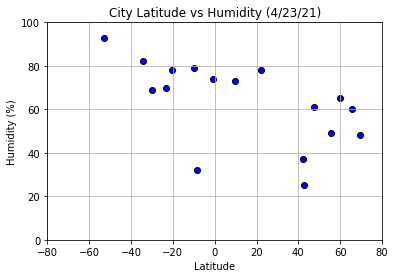

In [64]:
plt.grid()
plt.ylim(0, 100)
plt.xlim(-80, 80)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (4/23/21)') 
plt.scatter(cityDataClean_pd['Lat'], cityDataClean_pd['Humidity'], marker='o', facecolors='blue', edgecolors='black')

## Latitude vs. Cloudiness Plot

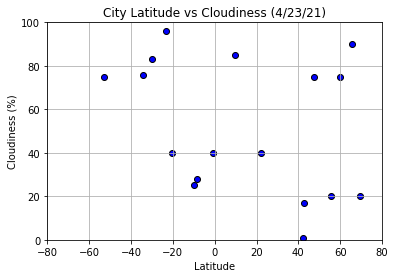

In [65]:
plt.grid()
plt.ylim(0, 100)
plt.xlim(-80, 80)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (4/23/21)') 
plt.scatter(cityDataClean_pd['Lat'], cityDataClean_pd['Cloudiness'], marker='o', facecolors='blue', edgecolors='black')

## Latitude vs. Wind Speed Plot

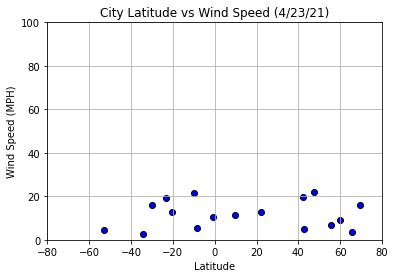

In [66]:
plt.grid()
plt.ylim(0, 100)
plt.xlim(-80, 80)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('City Latitude vs Wind Speed (4/23/21)') 
plt.scatter(cityDataClean_pd['Lat'], cityDataClean_pd['Wind Speed'], marker='o', facecolors='blue', edgecolors='black')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression